# Question 1: Load

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

np.random.seed(0)
random.seed(0)

In [2]:
lines = []
with open('transactions.txt', 'r',encoding='utf8') as f:
    for line in f:
        dic = json.loads(line)
        lines.append(dic)

data = pd.DataFrame(lines)

In [3]:
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,,1283.28,,,,False,,,False,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [5]:
data.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


<br>
By converting from JSON type to pandas dataframe, it contains a structure of 786363 rows × 29 columns. That means, there are a total of 786363 transactions collected in this dataset. There are 4 numerical features, 3 boolean variables and 22 objective features. The 'isFraud' column is our target column.
<br><br>

<br>
By observing the dataframe, there are some '' (missing) values in few columns, so I decide to replace them with null values, the most common way of filling data.
<br><br>

In [6]:
data_prepro = data.copy()

In [7]:
data_prepro.replace('', np.nan, inplace=True)

In [8]:
data_prepro

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


In [9]:
data_prepro.describe()

,creditLimit,availableMoney,transactionAmount,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,10759.464459,6250.725369,136.985791,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,11636.174890,8880.783989,147.725569,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,250.000000,-1005.630000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5000.000000,1077.420000,33.650000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,7500.000000,3184.860000,87.900000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,15000.000000,7500.000000,191.480000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,50000.000000,50000.000000,2011.540000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


<br>
Since there are 100% missing values for 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises' and 'recurringAuthInd' columns, I decide to drop these columns.
<br><br>

In [10]:
missing_columns = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises','recurringAuthInd']
data_prepro.drop(missing_columns, axis=1, inplace=True)

<br>
There are 4 numerical features after dropping some columns, which are 'creditLimit', 'availableMoney', 'transactionAmount', and 'currentBalance'. The minimum, maximum, mean and median values for numerical features are plotted and shown below.
<br><br>

In [11]:
num_col = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
num_col_name = ['Credit limit', 'Available money', 'Transaction amount', 'Current balance']
num_min, num_max, num_mean, num_median  = [], [], [], []

for col in num_col:
    num_min.append(data[col].min())
    num_max.append(data[col].max())
    num_mean.append(data[col].mean())
    num_median.append(data[col].median())

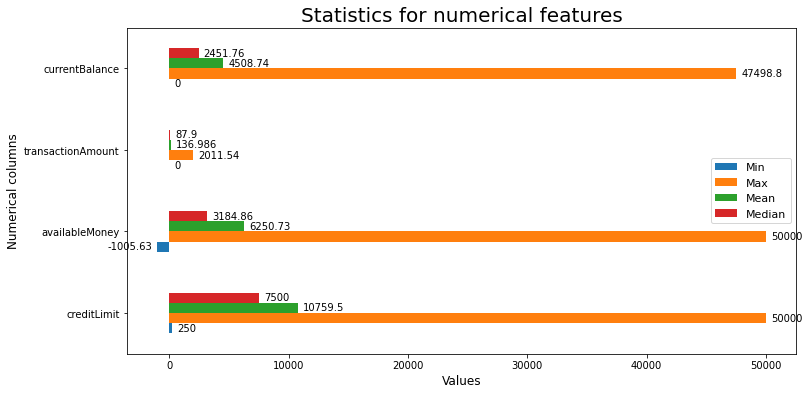

In [12]:
data_stats = {'Min': num_min,'Max': num_max,'Mean': num_mean,'Median': num_median}
stats = ['Min','Max', 'Mean', 'Median']
df_stats = pd.DataFrame(data_stats, columns=stats, index=num_col)
ax_stats = df_stats.plot.barh(figsize=(12,6))
for container in ax_stats.containers:
    ax_stats.bar_label(container, fontsize=10, padding=5)

ax_stats.set_title('Statistics for numerical features', fontsize=20)
ax_stats.set_ylabel('Numerical columns', fontsize=12)
ax_stats.set_xlabel('Values', fontsize=12)
ax_stats.legend(loc='right', prop={'size': 11}) 


In [13]:
for stat in stats:
    if stat == 'Min':
        for i in range(len(num_col)):
            print('The {} for {} is {}'.format(stat, num_col_name[i], num_min[i]))
    elif stat == 'Max':
        for i in range(len(num_col)):
            print('The {} for {} is {}'.format(stat, num_col_name[i], num_max[i]))
    elif stat == 'Mean':
        for i in range(len(num_col)):
            print('The {} for {} is {}'.format(stat, num_col_name[i], num_mean[i]))
    elif stat == 'Median':
        for i in range(len(num_col)):
            print('The {} for {} is {}'.format(stat, num_col_name[i], num_median[i]))
    print('------------------------------------------------------')

The Min for Credit limit is 250.0
The Min for Available money is -1005.63
The Min for Transaction amount is 0.0
The Min for Current balance is 0.0
------------------------------------------------------
The Max for Credit limit is 50000.0
The Max for Available money is 50000.0
The Max for Transaction amount is 2011.54
The Max for Current balance is 47498.81
------------------------------------------------------
The Mean for Credit limit is 10759.464458526152
The Mean for Available money is 6250.725369288736
The Mean for Transaction amount is 136.98579095150615
The Mean for Current balance is 4508.7390892374115
------------------------------------------------------
The Median for Credit limit is 7500.0
The Median for Available money is 3184.86
The Median for Transaction amount is 87.9
The Median for Current balance is 2451.76
------------------------------------------------------


<br>
There are 5000 unique account numbers and customer id in the dataset. The frequency distribution of account number and customer id are shown below.
<br><br>

In [14]:
print('There are {} unique account number'.format(data['accountNumber'].nunique()))
print('There are {} unique customer id'.format(data['customerId'].nunique()))

There are 5000 unique account number
There are 5000 unique customer id


# Question 2: Plot

<br>
Intuitively, it is easy to think of plotting the distribution histogram of transaction amount. The histogram is highly skewed to the right. As it is from real life data, it makes sense because most transactions occur in a normal amount.
<br><br>

Text(0.5, 0, 'Transaction amout')

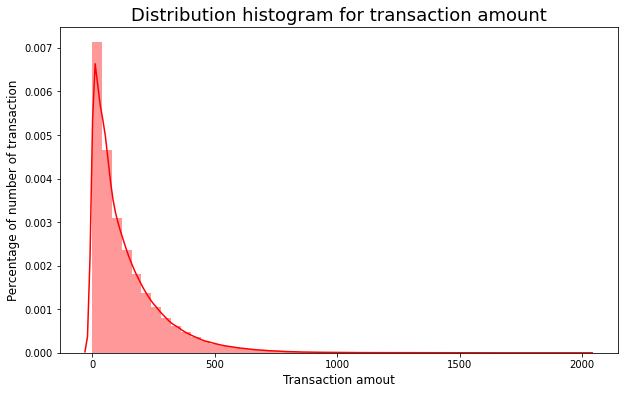

In [15]:
fig = plt.figure(figsize=(10,6))
ax_ta = sns.distplot(data_prepro['transactionAmount'], color='red')
ax_ta.set_title('Distribution histogram for transaction amount', fontsize=18)
ax_ta.set_ylabel('Percentage of number of transaction', fontsize=12)
ax_ta.set_xlabel('Transaction amout', fontsize=12)

<br>
I also made a visualization on the number of fraud and no-fraud transactions, as well as the percentage of fraud and non-fraud among all the dataset. There is only 12417, 1.58% from the dataset that a transaction is considered as fraud. Therefore, the data are also highly imbalanced.
<br><br>

False    773946
True      12417
Name: isFraud, dtype: int64

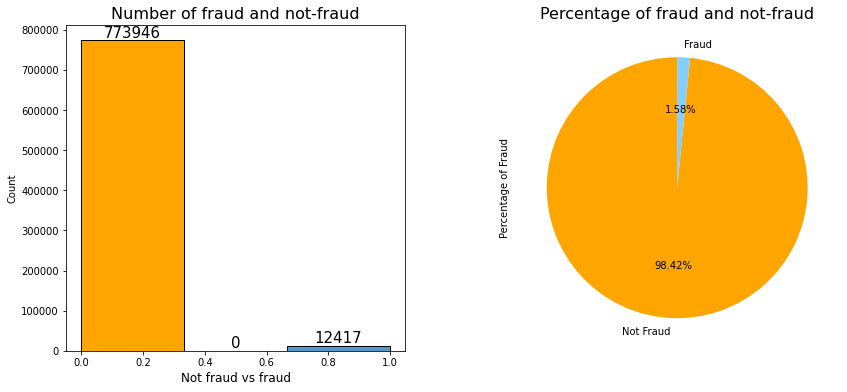

In [16]:
fig, ax_tf = plt.subplots(1,2,figsize=(14,6))
sns.histplot(data=data_prepro['isFraud'], bins=3, ax=ax_tf[0])
ax_tf[0].patches[0].set_facecolor('orange')
ax_tf[0].patches[1].set_facecolor('lightskyblue')
ax_tf[0].set_title('Number of fraud and not-fraud', fontsize=16)
ax_tf[0].set_xlabel('Not fraud vs fraud', fontsize=12)
for container in ax_tf[0].containers:
    ax_tf[0].bar_label(container, fontsize=15)

data_prepro['isFraud'].value_counts().plot.pie(autopct = "%.2f%%", ylabel='Percentage of Fraud', startangle=90, labels=['Not Fraud','Fraud'], colors=['orange', 'lightskyblue'])
ax_tf[1].set_title('Percentage of fraud and not-fraud', fontsize=16)
fig.subplots_adjust(wspace=0.3)
data_prepro['isFraud'].value_counts()

<br>
The strip plot below shows the distribution and density of fraud and non-fraud in terms of the transaction amount. Both fraud and non-fraud transactions have a relatively low transaction amount,which is expected. We can also see that the fraud transaction with the most transaction amount is still lower than the highest transaction amount that is not a fraud case. 
<br><br>

Text(0, 0.5, 'Transaction amount')

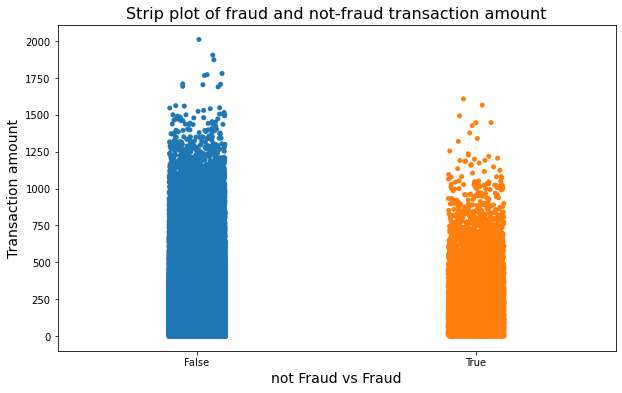

In [17]:
fig = plt.figure(figsize=(10,6))
ax_ta_tf_box = sns.stripplot(x='isFraud', y='transactionAmount', data=data_prepro, marker='o') 
ax_ta_tf_box.set_title('Strip plot of fraud and not-fraud transaction amount', fontsize=16)
ax_ta_tf_box.set_xlabel('not Fraud vs Fraud', fontsize=14)
ax_ta_tf_box.set_ylabel('Transaction amount', fontsize=14)

<br>
The below plots give conclusive insights of fraud and no-fraud distribution in terms of 4 numerical features: 'Credit limit', 'Available money', 'Transaction amount', 'Current balance'. Although there are some direct relations between numerical features, for example Current balance is the subtraction of credit limit and Available money, I still want to discover the distinct relation with fraud and non-fraud. All 4 distributions are expected after the results came out, but it is interesting to see that all 'Available money', 'Transaction amount', 'Current balance' are skewed to the right and share similar visualizations, although the distribution of transaction amount has a smooth curve, whereas the other two do not.
<br><br>

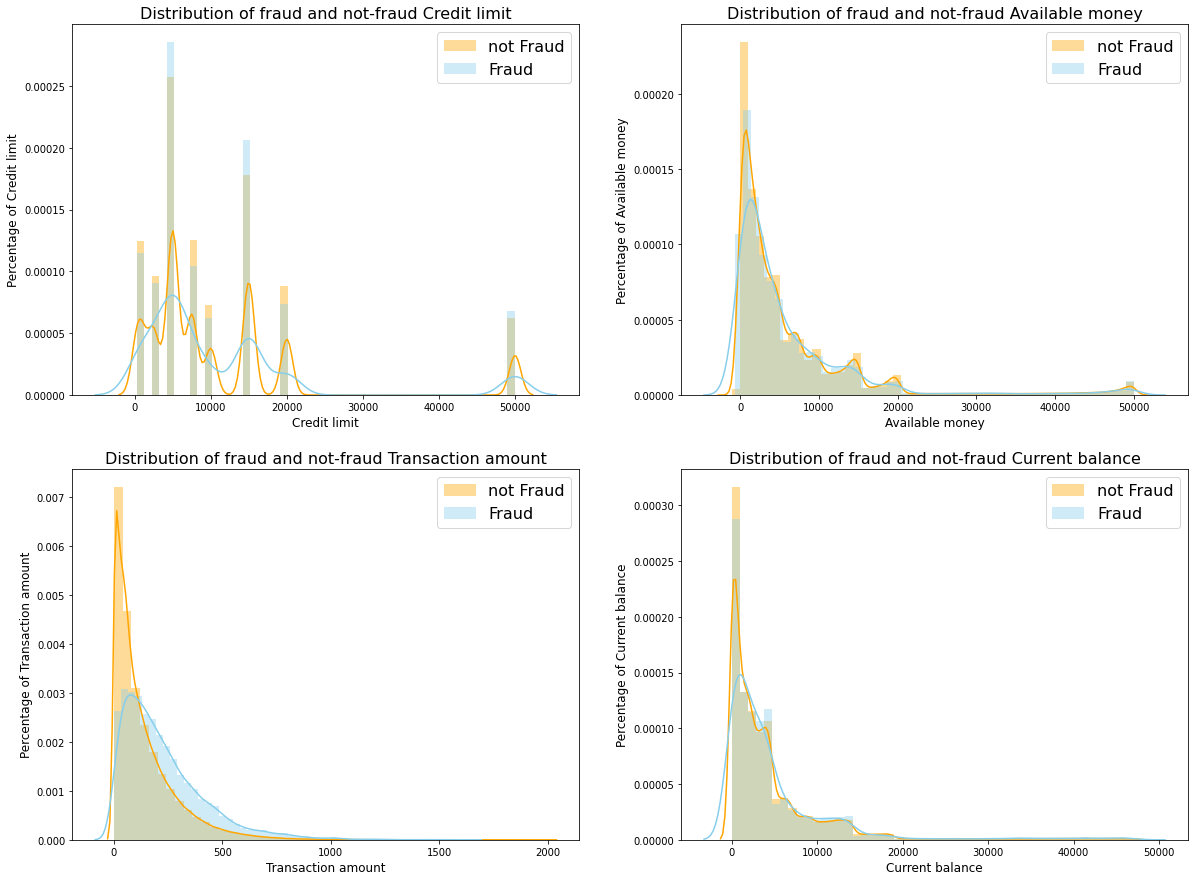

In [18]:
def find_TF(df, col):
    df_True = df.loc[df['isFraud']==True, col]
    df_False = df.loc[df['isFraud']==False, col]
    return df_True, df_False

count = 0
fig, ax_4_tf = plt.subplots(2,2, figsize=(20,15))
for i in range(2):
    for j in range(2):
        df_True, df_False = find_TF(data_prepro, num_col[count])
        sns.distplot(df_False, ax=ax_4_tf[i][j], color='orange', label='not Fraud')
        sns.distplot(df_True, ax=ax_4_tf[i][j], color='skyblue', label='Fraud')
        ax_4_tf[i][j].set_title('Distribution of fraud and not-fraud {}'.format(num_col_name[count]), fontsize=16)
        ax_4_tf[i][j].set_ylabel('Percentage of {}'.format(num_col_name[count]), fontsize=12)
        ax_4_tf[i][j].set_xlabel(num_col_name[count], fontsize=12)
        ax_4_tf[i][j].legend(prop={'size': 16})
        count += 1

# Question 3: Data Wrangling - Duplicate Transactions

## Reversed Transaction:

* First of all, I may want to define the case for reversed transactions, in which a purchase is followed by a reversal. In this context, I group rows that have the same:
  * accountNumber, which refers to the same account number/ same customer
  * transactionAmount, which shows the evidence of the same purchase by the price
  * merchantName, which indicates that the purchase happens with same merchant	
  * cardLast4Digits, which shows the evidence of using the same card.
<br> <br>
* After that, I select each of the grouped rows as a different index/rank and then recognize whether each grouped case meets the criteria of 'Reversed Transaction' by looking through the transactionType column, which shows specific transaction types. If it meets, I label them as True for the 'isReversal' column that I created for all the qualified rows. Even though the original transaction type may not be 'REVERSAL' for some rows that lebel True for 'isReversal' column, there is at least one 'REVERSAL' transaction that happened after that transaction. So in this case, it should be labeled as True for the 'isReversal' condition.
<br><br> 
* Finally, I compare the result with the original dataset that has the transaction type of 'REVERSAL', calculate the total dollar amount for the reversed transactions, as well as plot the distribution of fraud and not fraud for all the reversal transactions to see any potential relationship.
<br><br>

In [19]:
data_prepro_new = data_prepro.copy()

In [20]:
data_prepro_new

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


<br> 
There is a total of 745193 PURCHASE type, 20303 REVERSAL type and 20169 ADDRESS_VERIFICATION type.
<br><br>

In [21]:
data_prepro_new['transactionType'].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

<br> 
By using the below function, I recognize that the 'accountNumber' and the 'customerId' columns are identical.
<br><br>

In [22]:
data_prepro_new[data_prepro_new['accountNumber'] != data_prepro_new['customerId']]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud


<br> 
Because a reversal type is followed by a purchase type and I believe that the four core features should be identical consistently, I use the following methods to go through the rows that share all 4 features.
<br><br>

In [23]:
duplicated_element = ['accountNumber', 'transactionAmount', 'merchantName', 'cardLast4Digits']
data_reve_duplicated = data_prepro_new[data_prepro_new.duplicated(subset=duplicated_element, keep=False)]

In [24]:
data_reve_duplicated

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
11,830329091,830329091,5000.0,5000.00,2016-12-07T16:34:04,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,False,False,False
12,830329091,830329091,5000.0,4959.25,2016-12-14T10:00:35,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,40.75,False,False,False
13,830329091,830329091,5000.0,4918.50,2016-12-20T18:38:23,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,81.50,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786346,732852505,732852505,50000.0,49536.24,2016-11-22T19:30:16,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,463.76,True,False,False
786348,732852505,732852505,50000.0,49251.72,2016-11-25T13:39:10,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,748.28,False,False,False
786352,732852505,732852505,50000.0,49848.35,2016-12-07T14:05:14,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,151.65,True,False,False
786357,732852505,732852505,50000.0,48956.44,2016-12-22T07:27:23,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1043.56,True,False,False


<br>
Here, I create a new column 'Rank_by_transaction' to keep track of the 'same' purchase that shares the same 4 features as explained above.
<br><br>

In [25]:
data_reve_duplicated_setindex = data_reve_duplicated.drop_duplicates(subset=duplicated_element, keep = 'first')
data_reve_duplicated_setindex['index'] = data_reve_duplicated_setindex.index
data_reve_duplicated_setindex['Rank_by_transaction'] = data_reve_duplicated_setindex['index'].rank(method='first').astype(int)

In [26]:
lst_on = data_reve_duplicated_setindex.columns.tolist()
for ele in duplicated_element:
    lst_on.remove(ele)
lst_on.remove('Rank_by_transaction')
data_reve_duplicated_setindex.drop(lst_on, axis=1, inplace=True)
data_reve_duplicated = pd.merge(data_reve_duplicated, data_reve_duplicated_setindex, on=duplicated_element, how='left')

<br>
Here, I use the determine_Reversal function to determine whether the grouped row is reversal type or not by looking at the last row of the 'same' purchase and if the transaction type is 'REVERSAL' than it should be labeled as True for the 'isReversal' column.
<br><br>

In [27]:
def determine_Reversal(df):
    if df['transactionType'] == 'REVERSAL':
        return True
    else:
        return False

In [28]:
data_reve_duplicated_setreve = data_reve_duplicated.drop_duplicates(subset=['Rank_by_transaction'], keep='last')
data_reve_duplicated_setreve['isReversal'] = data_reve_duplicated_setreve.apply(determine_Reversal, axis=1)

<br> 
After all the above process for identifying and recognizing 'isReversal' column, I merge the column back to the original dataframe data_prepro_new and leave out some helper columns.
<br><br>

In [29]:
lst_on = data_reve_duplicated_setreve.columns.tolist()
lst_on.remove('Rank_by_transaction')
lst_on.remove('isReversal')
data_reve_duplicated_setreve.drop(lst_on, axis=1, inplace=True)
data_reve_duplicated = pd.merge(data_reve_duplicated, data_reve_duplicated_setreve, on=['Rank_by_transaction'] ,how='left')

In [30]:
lst_on = data_reve_duplicated.columns.tolist()
for ele in duplicated_element:
    lst_on.remove(ele)
lst_on.remove('isReversal')
data_reve_duplicated.drop(lst_on, axis=1, inplace=True)
data_reve_duplicated.drop_duplicates(keep = 'first', inplace=True)
data_prepro_new = pd.merge(data_prepro_new, data_reve_duplicated, on=duplicated_element ,how='left')
data_prepro_new['isReversal'].fillna(False,inplace=True)

<br> 
Below is the dataframe that is labeled True for the 'isReversal' column. The dataframe shape is 36556 * 24 which is expected.
<br><br>

In [31]:
data_reve_True_combine = data_prepro_new.loc[data_prepro_new['isReversal'] == True]
data_reve_True_combine

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,isReversal
38,574788567,574788567,2500.0,2416.11,2016-05-24T01:35:33,215.13,Convenient Tire,US,US,09,...,2015-10-13,206,206,8522,PURCHASE,83.89,True,False,False,True
39,574788567,574788567,2500.0,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,...,2015-10-13,206,206,8522,REVERSAL,299.02,True,False,False,True
100,924729945,924729945,50000.0,50000.00,2016-10-04T04:20:04,168.57,discount.com,US,US,05,...,2014-07-25,205,265,9459,PURCHASE,0.00,False,False,False,True
101,924729945,924729945,50000.0,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,...,2014-07-25,205,265,9459,REVERSAL,168.57,False,False,False,True
113,984504651,984504651,50000.0,49138.85,2016-01-06T04:08:06,83.64,1st Sandwitch Bar #801388,US,US,09,...,2015-07-27,640,640,8332,PURCHASE,861.15,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786120,638498773,638498773,10000.0,9798.21,2016-01-01T19:48:03,201.79,KFC #928167,US,US,05,...,2014-11-17,175,175,321,REVERSAL,201.79,True,False,False,True
786207,638498773,638498773,10000.0,1271.91,2016-10-09T04:52:23,86.14,Dunkin' Donuts #396342,US,US,05,...,2014-11-17,387,387,4635,PURCHASE,8728.09,True,False,False,True
786219,638498773,638498773,10000.0,5331.33,2016-11-03T04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,...,2014-11-17,387,387,4635,REVERSAL,4668.67,True,False,False,True
786300,732852505,732852505,50000.0,49882.78,2016-06-16T10:32:11,22.55,Uber,US,US,90,...,2012-08-23,939,939,3388,PURCHASE,117.22,False,False,False,True


<br>
Below is the dataframe that is labeled 'REVERSAL' for the 'transactionType' column. I intercept from the original data_prepro dataframe and the shape for this dataframe is 20303  * 24 which is expected and corresponds to the number of 'REVERSAL'  transaction type.
<br><br>
Two dataframes’ row length are different and it is expected. Since I am labeling the combination of ‘purchase-reversal‘ as True for the 'isReversal' column, the number of the isReversal == True rows should be larger than those rows that are 'REVERSAL' in the column 'transactionType'.
<br><br> 

In [32]:
data_reve = data_prepro[data_prepro['transactionType'] == 'REVERSAL']
data_reve

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500.0,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,...,2015-10-13,2015-10-13,206,206,8522,REVERSAL,299.02,True,False,False
73,574788567,574788567,2500.0,2432.72,2016-10-07T10:23:57,3.87,Eazy Repair,US,US,05,...,2015-10-13,2015-10-13,579,579,4219,REVERSAL,67.28,True,False,False
101,924729945,924729945,50000.0,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,...,2014-07-25,2014-07-25,205,265,9459,REVERSAL,168.57,False,False,False
133,984504651,984504651,50000.0,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,3632.59,False,False,False
156,984504651,984504651,50000.0,41909.30,2016-01-25T20:39:15,81.73,AMC #724446,US,US,09,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,8090.70,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786106,899818521,899818521,2500.0,968.33,2016-09-29T02:04:32,10.05,cheapfast.com,US,US,02,...,2013-06-15,2013-06-15,421,421,3424,REVERSAL,1531.67,False,False,False
786120,638498773,638498773,10000.0,9798.21,2016-01-01T19:48:03,201.79,KFC #928167,US,US,05,...,2014-11-17,2014-11-17,175,175,321,REVERSAL,201.79,True,False,False
786219,638498773,638498773,10000.0,5331.33,2016-11-03T04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,...,2014-11-17,2014-11-17,387,387,4635,REVERSAL,4668.67,True,False,False
786225,638498773,638498773,10000.0,4393.10,2016-11-06T22:54:25,49.39,Shake Shack #118502,US,US,05,...,2014-11-17,2014-11-17,387,387,4635,REVERSAL,5606.90,True,False,False


<br> 
As I found out in the previous part that there are 20303 reversed transactions. Here is the total number and percentage of non-fraud and fraud transactions from the 'transactionType' column that is labeled as 'REVERSAL'. A reversal transaction may not directly give us an insight for the reason of fraud transaction since the results are imbalanced. <br>

* There are 19966 non-fraud in the reversed transaction, and it is about 98.34% of the total reversed transaction. 
* There are 337 fraud in the reversed transaction, and it is about 1.66% of the total reversed transaction. 
<br><br>

False    19966
True       337
Name: isFraud, dtype: int64

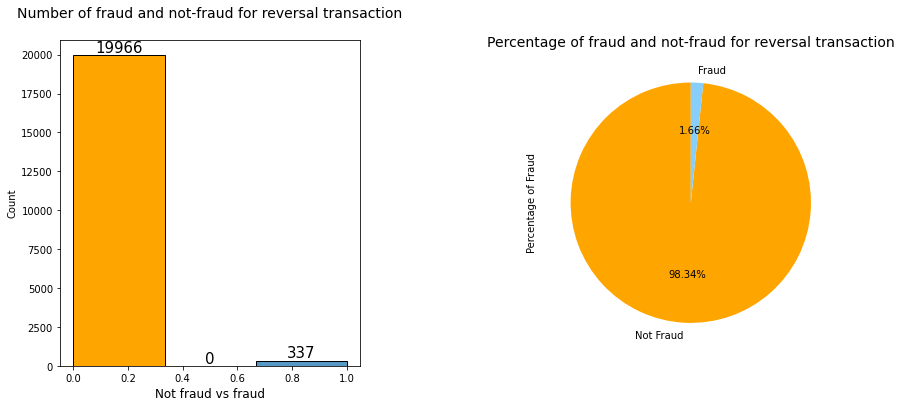

In [33]:
fig, ax_reve_tf = plt.subplots(1,2,figsize=(14,6))
sns.histplot(data=data_reve['isFraud'], bins=3, ax=ax_reve_tf[0])
ax_reve_tf[0].patches[0].set_facecolor('orange')
ax_reve_tf[0].patches[1].set_facecolor('lightskyblue')
ax_reve_tf[0].set_title('Number of fraud and not-fraud for reversal transaction''\n', fontsize=14)
ax_reve_tf[0].set_xlabel('Not fraud vs fraud', fontsize=12)
for container in ax_reve_tf[0].containers:
    ax_reve_tf[0].bar_label(container, fontsize=15)

data_reve['isFraud'].value_counts().plot.pie(autopct = "%.2f%%", ylabel='Percentage of Fraud', startangle=90, labels=['Not Fraud','Fraud'], colors=['orange', 'lightskyblue'])
ax_reve_tf[1].set_title('Percentage of fraud and not-fraud for reversal transaction', fontsize=14)

fig.subplots_adjust(wspace=0.6)
data_reve['isFraud'].value_counts()

In [34]:
data_reve.shape

(20303, 23)

<br> 
The total dollar amount for the reversal transactions is 2821792.5
<br><br>

In [35]:
total_reversal_amount = data_reve['transactionAmount'].sum()
total_reversal_amount

2821792.5

<br> 
The new dataframe with a 'isReversal' column.
<br><br>

In [36]:
data_prepro_new

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,isReversal
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False,False


## Multi-swipe  Transaction:

* The definition of multi-swipe transaction is simple and clear, in which a vendor accidentally charges a customer's card multiple times within a short time span. As identical to the previous reversal process, I try to find out multiple transaction that happens based on the following features:
  * accountNumber, which refers to the same account number/ same customer
  * transactionAmount, which shows the evidence of the same purchase by the price
  * merchantName, which indicates that the purchase happens with same merchant	
  * cardLast4Digits, which shows the evidence of using the same card.
  
  Then, I compare the transaction time between the neighbor transactions that share the same 4 features. The only thing I have to define is how long the short time span is, which I set to less than 5 minutes. 
<br> <br>
* After identifying each 'potential multi-swipe' transaction, I select each of the grouped rows as a different index/rank and then recognize whether each grouped case meets the criteria of 'Multi-swipe Transaction Transaction' by comparing the interval between the neighbor transactions. If it is less than 5 minutes, then I label it as True for 'isReversal' column which I created, label as 'False' otherwise.
<br><br> 
* Finally, I calculate the total dollar amount for the multi-swipe transactions, as well as plot the distribution of fraud and not fraud for all the Multi-swipe transactions to see any potential relationship.
<br><br> 

In [37]:
data_prepro_new['index'] = data_prepro_new.index

<br> 
Here, I find out the multiple transactions that have the same 'accountNumber', 'transactionAmount', 'merchantName'and 'cardLast4Digits.It is a common sense that a multi-swipe transaction may only occur under the same customer to the same merchant with same amount and using the same card. After that, I use rank() function to group them with the same rank/index for later use.The new index is labeled in the 'Rank_by_transaction' column.
<br><br> 

In [38]:
duplicated_element = ['accountNumber', 'transactionAmount', 'merchantName', 'cardLast4Digits']
data_multi_duplicated = data_prepro_new[data_prepro_new.duplicated(subset=duplicated_element, keep=False)]

data_multi_duplicated_setindex = data_multi_duplicated.drop_duplicates(subset=duplicated_element, keep = 'first')
data_multi_duplicated_setindex['index'] = data_multi_duplicated_setindex.index
data_multi_duplicated_setindex['Rank_by_transaction'] = data_multi_duplicated_setindex['index'].rank(method='first').astype(int)

In [39]:
lst_on = data_multi_duplicated_setindex.columns.tolist()
for ele in duplicated_element:
    lst_on.remove(ele)
lst_on.remove('Rank_by_transaction')
data_multi_duplicated_setindex.drop(lst_on, axis=1, inplace=True)
data_multi_duplicated = pd.merge(data_multi_duplicated, data_multi_duplicated_setindex, on=duplicated_element, how='left')

In [40]:
data_multi_duplicated.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,isReversal,index,Rank_by_transaction
0,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,486,767,PURCHASE,0.00,False,False,False,False,2,1
1,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,486,767,PURCHASE,0.00,False,False,False,False,3,1
2,830329091,830329091,5000.0,5000.00,2016-12-07T16:34:04,40.75,GreenCook,US,US,09,...,885,3143,PURCHASE,0.00,False,False,False,False,11,2
3,830329091,830329091,5000.0,4959.25,2016-12-14T10:00:35,40.75,GreenCook,US,US,09,...,885,3143,PURCHASE,40.75,False,False,False,False,12,2
4,830329091,830329091,5000.0,4918.50,2016-12-20T18:38:23,40.75,GreenCook,US,US,09,...,885,3143,PURCHASE,81.50,False,False,False,False,13,2
5,830329091,830329091,5000.0,4877.75,2016-12-28T06:43:01,40.75,GreenCook,US,US,09,...,885,3143,PURCHASE,122.25,False,False,False,False,14,2
6,574788567,574788567,2500.0,2416.11,2016-05-24T01:35:33,215.13,Convenient Tire,US,US,09,...,206,8522,PURCHASE,83.89,True,False,False,True,38,3
7,574788567,574788567,2500.0,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,...,206,8522,REVERSAL,299.02,True,False,False,True,39,3
8,574788567,574788567,2500.0,2500.00,2016-06-04T18:45:39,4.46,Play Store,US,US,09,...,206,8522,PURCHASE,0.00,False,False,False,False,43,4
9,574788567,574788567,2500.0,2288.12,2016-07-06T13:08:53,4.46,Play Store,US,US,09,...,206,8522,PURCHASE,211.88,False,False,False,False,48,4


<br> 
The below two functions are used to calculate the time differences between two neighbor transaction within the same 'Rank_by_transaction' column and determine whether it is a multi-swipe case by comparing the time difference with the threshold time 5 minutes.
Here are the details of two function:
<br>

* time_diff: create a new column 'timeDiff' that stores the time differences in minutes within the same rank. The first transaction in each rank should be placed with a Nan value.
* determine_multi_swipe: if the time difference is less than 5 minutes, then it will return True as it is considered as a multi-swipe case and store in the column 'isMulti_swipe', return False otherwise.
<br><br>

In [41]:
def determine_multi_swipe(df):
    if df['timeDiff'] <= 5:
        return True
    else:
        return False
    
def time_diff(df):
    df['timeDiff'] = df["transactionDateTime"].diff(1).dt.total_seconds().div(60)
    return df

In [42]:
data_multi_duplicated['transactionDateTime'] = pd.to_datetime(data_multi_duplicated['transactionDateTime'])
data_multi_duplicated = data_multi_duplicated.groupby(['Rank_by_transaction']).apply(time_diff)

In [43]:
data_multi_duplicated['isMulti_swipe'] = data_multi_duplicated.apply(determine_multi_swipe, axis=1)

<br> 
We can see that row # 7 is a multi-swipe case because the time interval between the last transaction is less than 5 minutes and thus I consider that as a multi-swipe case. The result is expected.
<br><br>

In [44]:
data_multi_duplicated.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,isReversal,index,Rank_by_transaction,timeDiff,isMulti_swipe
0,737265056,737265056,5000.0,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,PURCHASE,0.00,False,False,False,False,2,1,NaN,False
1,737265056,737265056,5000.0,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,PURCHASE,0.00,False,False,False,False,3,1,45656.183333,False
2,830329091,830329091,5000.0,5000.00,2016-12-07 16:34:04,40.75,GreenCook,US,US,09,...,PURCHASE,0.00,False,False,False,False,11,2,NaN,False
3,830329091,830329091,5000.0,4959.25,2016-12-14 10:00:35,40.75,GreenCook,US,US,09,...,PURCHASE,40.75,False,False,False,False,12,2,9686.516667,False
4,830329091,830329091,5000.0,4918.50,2016-12-20 18:38:23,40.75,GreenCook,US,US,09,...,PURCHASE,81.50,False,False,False,False,13,2,9157.800000,False
5,830329091,830329091,5000.0,4877.75,2016-12-28 06:43:01,40.75,GreenCook,US,US,09,...,PURCHASE,122.25,False,False,False,False,14,2,10804.633333,False
6,574788567,574788567,2500.0,2416.11,2016-05-24 01:35:33,215.13,Convenient Tire,US,US,09,...,PURCHASE,83.89,True,False,False,True,38,3,NaN,False
7,574788567,574788567,2500.0,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,...,REVERSAL,299.02,True,False,False,True,39,3,2.500000,True
8,574788567,574788567,2500.0,2500.00,2016-06-04 18:45:39,4.46,Play Store,US,US,09,...,PURCHASE,0.00,False,False,False,False,43,4,NaN,False
9,574788567,574788567,2500.0,2288.12,2016-07-06 13:08:53,4.46,Play Store,US,US,09,...,PURCHASE,211.88,False,False,False,False,48,4,45743.233333,False


<br> 
The below functions are used to merge back with the original dataframe 'data_prepro_new', as well as leave out some helper columns that are unnecessary.
<br><br>

In [45]:
lst_on = data_multi_duplicated.columns.tolist()
lst_on.remove('index')
lst_on.remove('isMulti_swipe')
data_multi_duplicated.drop(lst_on, axis=1, inplace=True)
data_prepro_new = pd.merge(data_prepro_new, data_multi_duplicated, on='index', how='left')
data_prepro_new['isMulti_swipe'].fillna(False,inplace=True)
data_prepro_new.drop('index', axis=1, inplace=True)

<br> 
The below dataframe 'data_multi_swipe' shows all the multi-swipe case. The dataframe shape is 13403 * 25, which means that there are 13403 multi-swipe cases in the dataset.
<br><br>

In [46]:
data_multi_swipe = data_prepro_new.loc[data_prepro_new['isMulti_swipe'] == True]
data_multi_swipe

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,isReversal,isMulti_swipe
39,574788567,574788567,2500.0,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,...,206,206,8522,REVERSAL,299.02,True,False,False,True,True
133,984504651,984504651,50000.0,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,...,640,640,8332,REVERSAL,3632.59,False,False,False,True,True
200,984504651,984504651,50000.0,36452.49,2016-02-12T05:10:49,34.92,Golds Gym #747443,US,US,09,...,640,640,8332,REVERSAL,13547.51,False,False,False,True,True
263,984504651,984504651,50000.0,26680.99,2016-03-12T06:34:29,118.52,AMC #706324,US,US,02,...,640,640,8332,PURCHASE,23319.01,True,False,False,False,True
264,984504651,984504651,50000.0,26562.47,2016-03-12T06:36:41,118.52,AMC #706324,US,US,02,...,640,640,8332,PURCHASE,23437.53,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785983,205026043,205026043,5000.0,451.59,2016-06-07T22:29:11,391.94,Uber,US,US,09,...,198,198,3931,PURCHASE,4548.41,False,False,False,False,True
785984,205026043,205026043,5000.0,433.52,2016-06-07T22:30:57,391.94,Uber,US,US,09,...,198,198,3931,PURCHASE,4566.48,False,False,False,False,True
786014,205026043,205026043,5000.0,1571.26,2016-09-18T06:08:02,56.26,Lyft,US,US,05,...,359,359,258,REVERSAL,3428.74,False,False,False,True,True
786120,638498773,638498773,10000.0,9798.21,2016-01-01T19:48:03,201.79,KFC #928167,US,US,05,...,175,175,321,REVERSAL,201.79,True,False,False,True,True


<br> 
Here is the total number and percentage of non-fraud and fraud transactions from the multi-swipe transaction. Same as reversal situation, a multi-swipe case may not directly give us an insight for the reason of fraud transaction since the results are imbalanced. 
<br>

* There are 13168 non-fraud in the multi-swipe transaction, and it is about 98.25% of the total multi-swipe transaction. 
* There are 235 fraud in the multi-swipe transaction, and it is about 1.75% of the total multi-swipe transaction. 
<br><br>

False    13168
True       235
Name: isFraud, dtype: int64

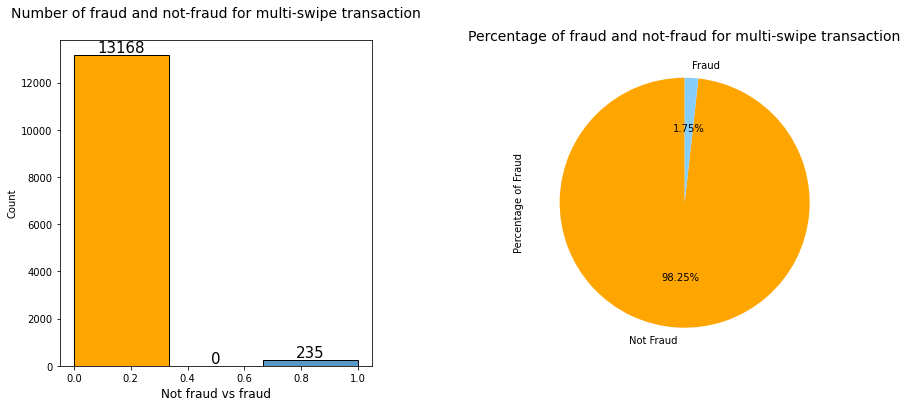

In [47]:
fig, ax_multi_tf = plt.subplots(1,2,figsize=(14,6))
sns.histplot(data=data_multi_swipe['isFraud'], bins=3, ax=ax_multi_tf[0])
ax_multi_tf[0].patches[0].set_facecolor('orange')
ax_multi_tf[0].patches[1].set_facecolor('lightskyblue')
ax_multi_tf[0].set_title('Number of fraud and not-fraud for multi-swipe transaction''\n', fontsize=14)
ax_multi_tf[0].set_xlabel('Not fraud vs fraud', fontsize=12)
for container in ax_multi_tf[0].containers:
    ax_multi_tf[0].bar_label(container, fontsize=15)

data_multi_swipe['isFraud'].value_counts().plot.pie(autopct = "%.2f%%", ylabel='Percentage of Fraud', startangle=90, labels=['Not Fraud','Fraud'], colors=['orange', 'lightskyblue'])
ax_multi_tf[1].set_title('Percentage of fraud and not-fraud for multi-swipe transaction', fontsize=14)
fig.subplots_adjust(wspace=0.5)
data_multi_swipe['isFraud'].value_counts()

In [48]:
data_multi_swipe.shape

(13403, 25)

<br> 
The total dollar amount for the multi-swipe transactions is 1933949.11.
<br><br>

In [49]:
total_multi_swipe_amount = data_multi_swipe['transactionAmount'].sum()
total_multi_swipe_amount

1933949.11

<br> 
The below is the percentage of reversal vs non-reversal and multi-swipe vs non-mult-swipe from all the fraud transactions.
<br>

* There are 95.01% of non-reversal and 4.99% of reversal transaction from the fraud transactions. 
* There are 98.11% of non-multi-swipe and 1.89% of multi-swipe transaction from the fraud transactions. 
<br><br>

In [50]:
data_fraud = data_prepro_new[data_prepro_new['isFraud'] == True]
data_fraud

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,isReversal,isMulti_swipe
694,984504651,984504651,50000.0,8613.80,2016-09-08T16:14:40,165.26,Walgreens #860120,US,US,09,...,640,640,8332,PURCHASE,41386.20,False,False,True,False,False
971,114896048,114896048,15000.0,14113.96,2016-01-06T08:05:06,298.85,sears.com,US,US,09,...,773,773,8915,PURCHASE,886.04,False,False,True,False,False
1072,114896048,114896048,15000.0,13702.47,2016-03-07T02:40:54,406.89,Planet Fitness #136615,US,US,09,...,773,773,8915,PURCHASE,1297.53,False,False,True,False,False
1113,114896048,114896048,15000.0,8943.58,2016-04-09T15:14:04,439.31,oldnavy.com,US,US,09,...,773,773,8915,PURCHASE,6056.42,False,False,True,False,False
1321,114896048,114896048,15000.0,5223.03,2016-08-24T01:24:35,266.09,sears.com,US,US,09,...,773,773,8915,PURCHASE,9776.97,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785680,207667444,207667444,7500.0,5517.88,2016-02-16T06:14:11,385.41,staples.com,US,US,90,...,235,235,9853,PURCHASE,1982.12,False,False,True,False,False
785713,207667444,207667444,7500.0,764.48,2016-06-14T12:03:12,393.43,Pizza Hut #288835,US,US,09,...,235,235,9853,PURCHASE,6735.52,True,False,True,False,False
785888,428856030,428856030,250.0,61.94,2016-08-25T15:55:11,370.43,discount.com,US,US,09,...,990,990,7660,PURCHASE,188.06,False,False,True,False,False
786054,657364505,657364505,20000.0,20000.00,2016-08-21T14:41:30,28.09,Next Day Online Services,US,US,09,...,138,138,6163,PURCHASE,0.00,False,False,True,False,False


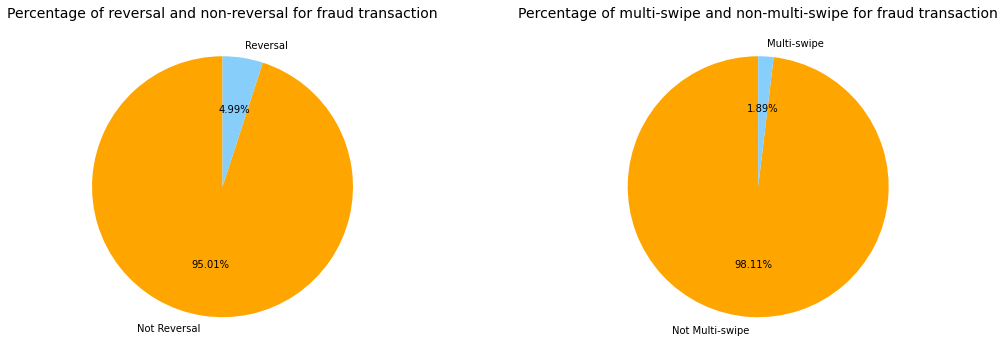

In [51]:
fig, ax_fraud2 = plt.subplots(1,2,figsize=(16,6))
ax_fraud2[0].pie(data_fraud['isReversal'].value_counts(), autopct = "%.2f%%", startangle=90, labels=['Not Reversal','Reversal'], colors=['orange', 'lightskyblue'])
ax_fraud2[0].set_title('Percentage of reversal and non-reversal for fraud transaction', fontsize=14)
ax_fraud2[1].pie(data_fraud['isMulti_swipe'].value_counts(), autopct = "%.2f%%", startangle=90, labels=['Not Multi-swipe','Multi-swipe'], colors=['orange', 'lightskyblue'])
ax_fraud2[1].set_title('Percentage of multi-swipe and non-multi-swipe for fraud transaction', fontsize=14)
fig.subplots_adjust(wspace=0.5)

In [52]:
data_combine = data_prepro_new.loc[(data_prepro_new['isMulti_swipe'] == True) & (data_prepro_new['isReversal'] == True)]
data_combine

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,isReversal,isMulti_swipe
39,574788567,574788567,2500.0,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,...,206,206,8522,REVERSAL,299.02,True,False,False,True,True
133,984504651,984504651,50000.0,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,...,640,640,8332,REVERSAL,3632.59,False,False,False,True,True
200,984504651,984504651,50000.0,36452.49,2016-02-12T05:10:49,34.92,Golds Gym #747443,US,US,09,...,640,640,8332,REVERSAL,13547.51,False,False,False,True,True
468,984504651,984504651,50000.0,12228.86,2016-06-05T13:39:15,234.45,Regal Cinemas #729464,US,US,02,...,640,640,8332,REVERSAL,37771.14,True,False,False,True,True
735,984504651,984504651,50000.0,2715.49,2016-09-28T07:09:09,36.74,WSC #162278,US,US,02,...,640,640,8332,REVERSAL,47284.51,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785544,841351704,841351704,50000.0,20269.51,2016-12-07T00:29:09,67.98,Washington News,US,US,09,...,651,651,7831,REVERSAL,29730.49,False,False,False,True,True
785576,841351704,841351704,50000.0,15986.98,2016-12-22T22:27:25,52.69,Washington Times,US,US,05,...,651,651,7831,REVERSAL,34013.02,False,False,False,True,True
785587,841351704,841351704,50000.0,13979.93,2016-12-27T18:13:11,206.92,NY News,US,US,02,...,651,651,7831,REVERSAL,36020.07,True,False,False,True,True
786014,205026043,205026043,5000.0,1571.26,2016-09-18T06:08:02,56.26,Lyft,US,US,05,...,359,359,258,REVERSAL,3428.74,False,False,False,True,True


<br> 
The left pie chart below shows the percentage of fraud vs non-fraud within all the cases that occur reversal and multi-swipe at the same time. The right pie chart shows the percentage of cases occur both multi-swipe and reversal at the same or not under all the fraud transactions.
<br>

* There are 98.16% of non-fraud and 1.84% of fraud transactions from both reversal and multi-swipe cases.
* There are 99.14% of non-both multi-swipe and reversal and 0.86% of both multi-swipe and reversal from the fraud transactions. 
<br><br>

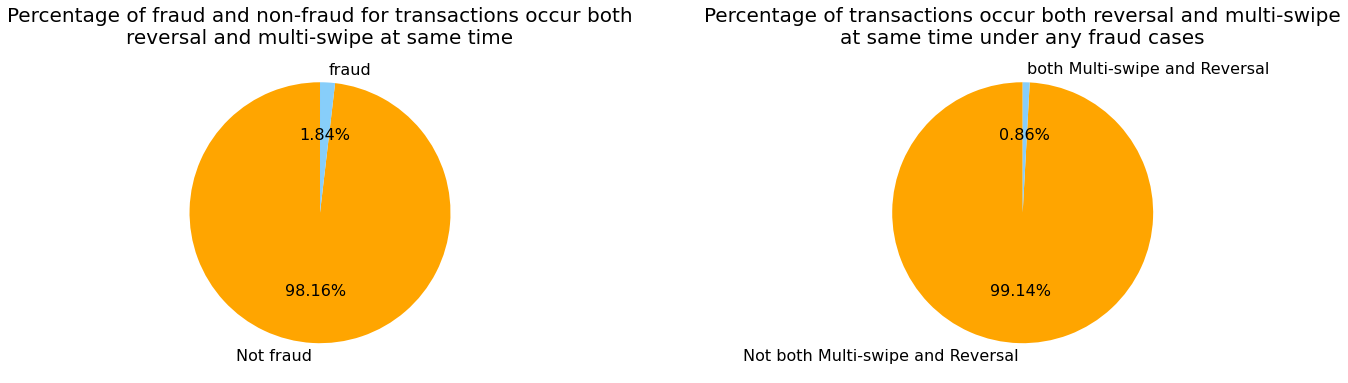

In [53]:
fig, ax_combine = plt.subplots(1,2,figsize=(20,6))
ax_combine[0].pie(data_combine['isFraud'].value_counts(), autopct = "%.2f%%", startangle=90, labels=['Not fraud','fraud'], colors=['orange', 'lightskyblue'], textprops={'fontsize': 16})
ax_combine[0].set_title('Percentage of fraud and non-fraud for transactions occur both''\n''reversal and multi-swipe at same time', fontsize=20)
ax_combine[1].pie((data_fraud['isReversal'] & data_fraud['isMulti_swipe']).value_counts(), autopct = "%.2f%%", startangle=90, labels=['Not both Multi-swipe and Reversal','both Multi-swipe and Reversal'], colors=['orange', 'lightskyblue'], textprops={'fontsize': 16})
ax_combine[1].set_title('Percentage of transactions occur both reversal and multi-swipe''\n''at same time under any fraud cases', fontsize=20)

fig.subplots_adjust(wspace=0.7)

<br> 
The new 'data_prepro_new' dataframe after adding two additional columns.
<br><br>

In [54]:
data_prepro_new

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,isReversal,isMulti_swipe
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,414,414,1803,PURCHASE,0.00,False,False,False,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,486,486,767,PURCHASE,0.00,True,False,False,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,486,486,767,PURCHASE,0.00,False,False,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,486,486,767,PURCHASE,0.00,False,False,False,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,885,885,3143,PURCHASE,0.00,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,936,936,3783,PURCHASE,1095.04,False,False,False,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,939,939,3388,PURCHASE,1214.96,False,False,False,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,936,936,3783,PURCHASE,1233.85,False,False,False,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,939,939,3388,PURCHASE,1283.28,False,False,False,False,False


In [55]:
data_prepro_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

## Did you find anything interesting about either kind of transaction?

* As shown in the previous parts, there is no evidence indicating that there is a clear relation between reversal and fraud and mult-swipe and fraud, because the result is highly skewed to one side. However, this process is still helpful because we have identified several duplicate transactions.
<br> <br>
* The distributions of reversal and non-reversal and multi_swipe and non-multi_swipe of the 4 numerical features 'Credit limit', 'Available money', 'Transaction amount’ and 'Current balance' are shown below. By comparison, both plots are similar to those distribution of fraud and non-fraud that I did previously. 
<br><br> 
* Finally, I look through the total amount and average amount of reversal and multi-swipe in comparison with the total and average amount. I plot a few pie charts and bar charts for reversal and multi-swipe respectively. The result indicates that the total amount of reversal and mult-swipe are about 4.97% and 1.80% of the total transaction amount, which is expected since the percentage of the number of reversal and mult-swipe are also in a minority. Besides,there are only slight differences, about 8-10 dollars difference, for both average reversal and total transaction amount and average multi-swipe and total transaction amount.
<br><br> 

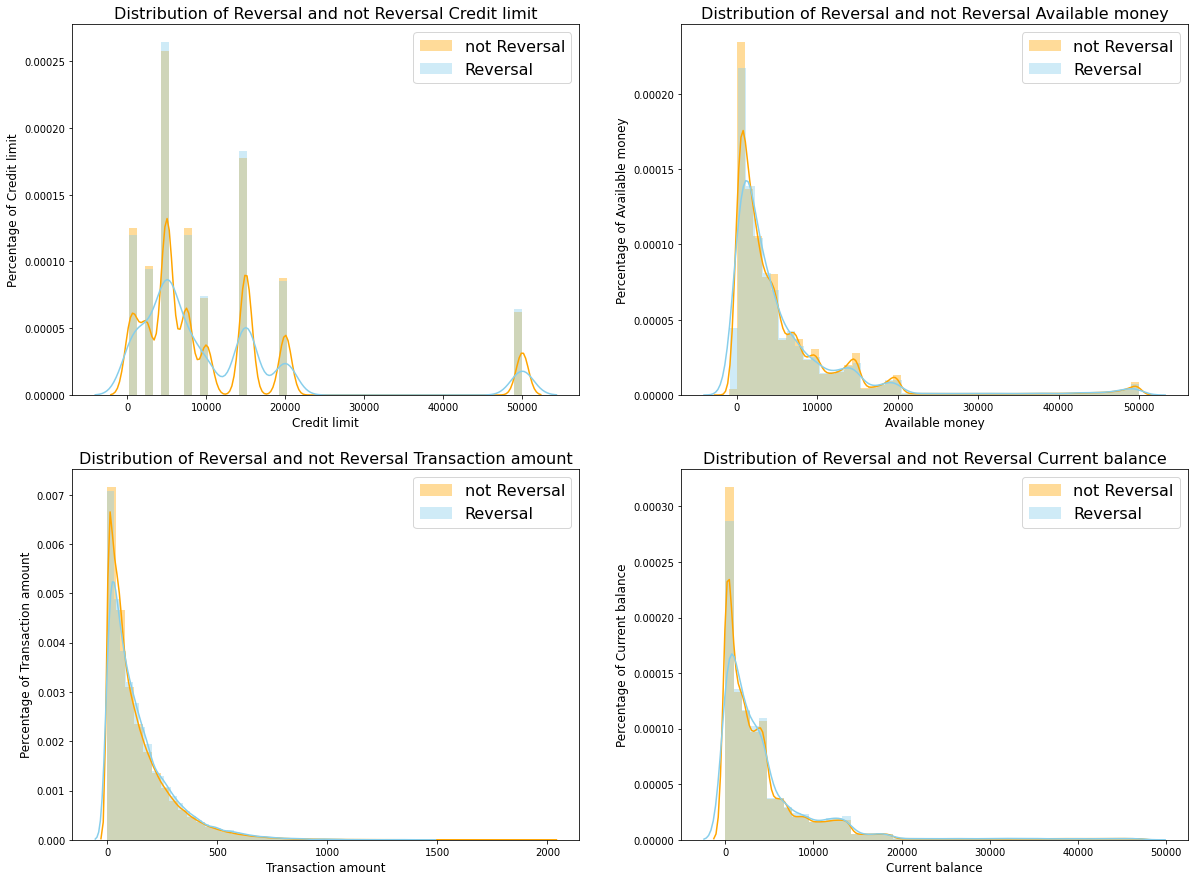

In [56]:
def find_TF_rev(df, col):
    df_True = df.loc[df['isReversal']==True, col]
    df_False = df.loc[df['isReversal']==False, col]
    return df_True, df_False

count = 0
fig, ax_4_tf = plt.subplots(2,2, figsize=(20,15))
for i in range(2):
    for j in range(2):
        df_True, df_False = find_TF_rev(data_prepro_new, num_col[count])
        sns.distplot(df_False, ax=ax_4_tf[i][j], color='orange', label='not Reversal')
        sns.distplot(df_True, ax=ax_4_tf[i][j], color='skyblue', label='Reversal')
        ax_4_tf[i][j].set_title('Distribution of Reversal and not Reversal {}'.format(num_col_name[count]), fontsize=16)
        ax_4_tf[i][j].set_ylabel('Percentage of {}'.format(num_col_name[count]), fontsize=12)
        ax_4_tf[i][j].set_xlabel(num_col_name[count], fontsize=12)
        ax_4_tf[i][j].legend(prop={'size': 16})
        count += 1

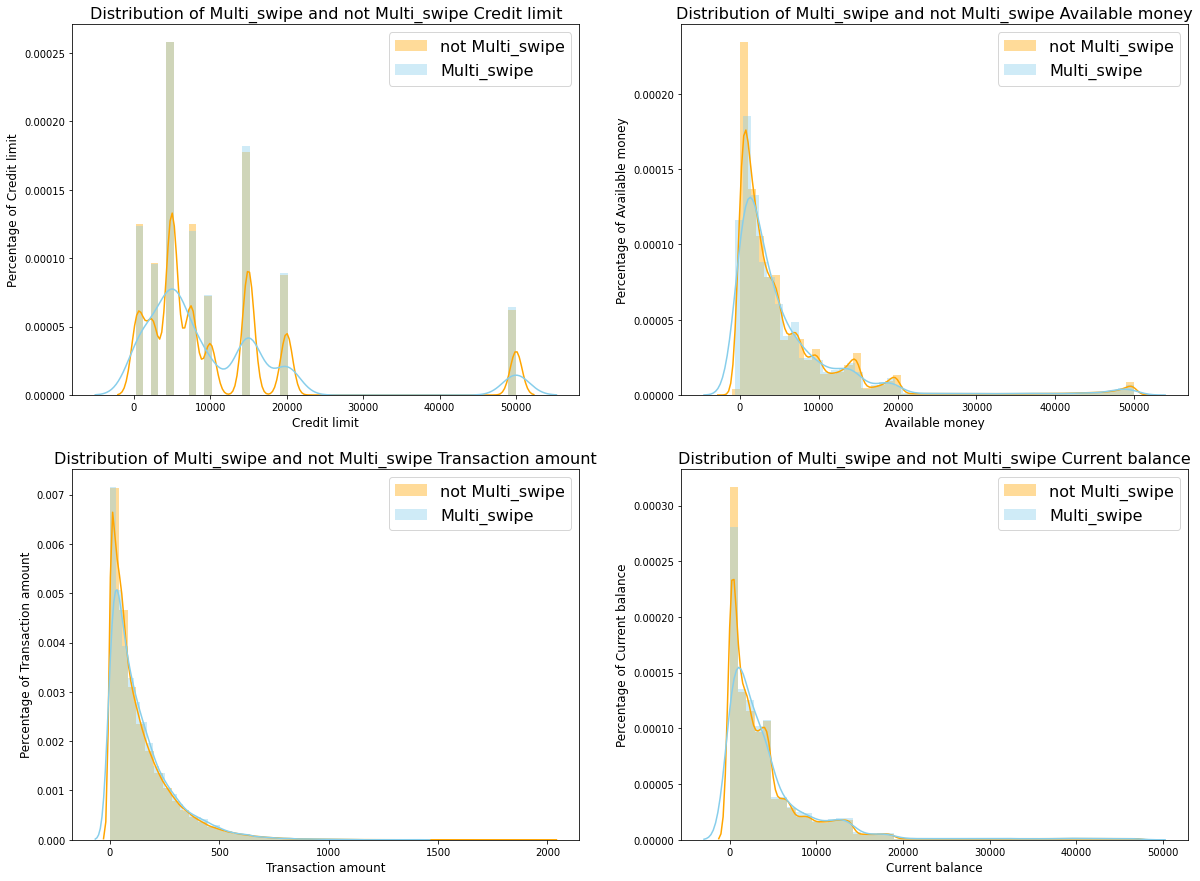

In [57]:
def find_TF_multi(df, col):
    df_True = df.loc[df['isMulti_swipe']==True, col]
    df_False = df.loc[df['isMulti_swipe']==False, col]
    return df_True, df_False

count = 0
fig, ax_4_tf = plt.subplots(2,2, figsize=(20,15))
for i in range(2):
    for j in range(2):
        df_True, df_False = find_TF_multi(data_prepro_new, num_col[count])
        sns.distplot(df_False, ax=ax_4_tf[i][j], color='orange', label='not Multi_swipe')
        sns.distplot(df_True, ax=ax_4_tf[i][j], color='skyblue', label='Multi_swipe')
        ax_4_tf[i][j].set_title('Distribution of Multi_swipe and not Multi_swipe {}'.format(num_col_name[count]), fontsize=16)
        ax_4_tf[i][j].set_ylabel('Percentage of {}'.format(num_col_name[count]), fontsize=12)
        ax_4_tf[i][j].set_xlabel(num_col_name[count], fontsize=12)
        ax_4_tf[i][j].legend(prop={'size': 16})
        count += 1

In [58]:
def compare_amount_rev(df):
    total_amount = df['transactionAmount'].sum()
    avg_amount = df['transactionAmount'].mean()
    df_amount = df.loc[df['isReversal'] == True]
    rev_total = df_amount['transactionAmount'].sum()
    rev_avg = df_amount['transactionAmount'].mean()
    return ([rev_total, total_amount-rev_total], [rev_avg, avg_amount])

def compare_amount_multi(df):
    total_amount = df['transactionAmount'].sum()
    avg_amount = df['transactionAmount'].mean()
    df_amount = df.loc[df['isMulti_swipe'] == True]
    multi_total = df_amount['transactionAmount'].sum()
    multi_avg = df_amount['transactionAmount'].mean()
    return ([multi_total, total_amount-multi_total], [multi_avg, avg_amount])

size_rev = compare_amount_rev(data_prepro_new)
size_multi = compare_amount_multi(data_prepro_new)

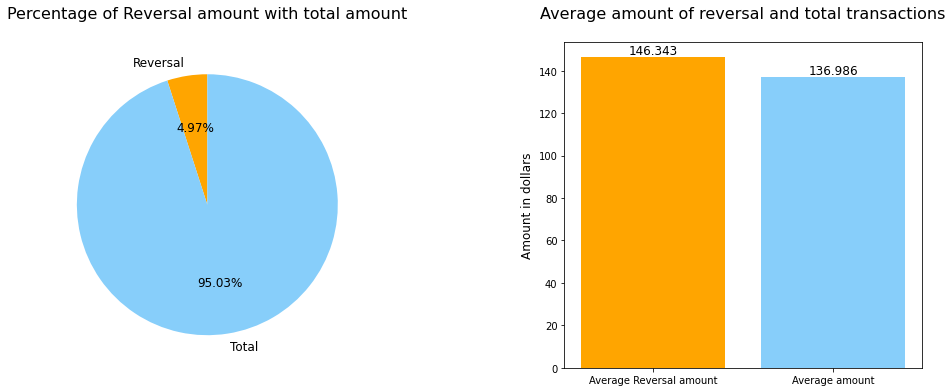

In [59]:
fig, ax_reve_all = plt.subplots(1,2,figsize=(16,6))
ax_reve_all[0].pie(size_rev[0], autopct = "%.2f%%", startangle=90, labels=['Reversal','Total'], colors=['orange', 'lightskyblue'], textprops={'fontsize': 12})
ax_reve_all[0].set_title('Percentage of Reversal amount with total amount''\n', fontsize=16)
ax_reve_all[1].bar(['Average Reversal amount','Average amount'], size_rev[1], color=['orange', 'lightskyblue'])
ax_reve_all[1].set_title('Average amount of reversal and total transactions''\n', fontsize=16)
ax_reve_all[1].set_ylabel('Amount in dollars',fontsize=12)
for container in ax_reve_all[1].containers:
    ax_reve_all[1].bar_label(container, fontsize=12)
fig.subplots_adjust(wspace=0.5)

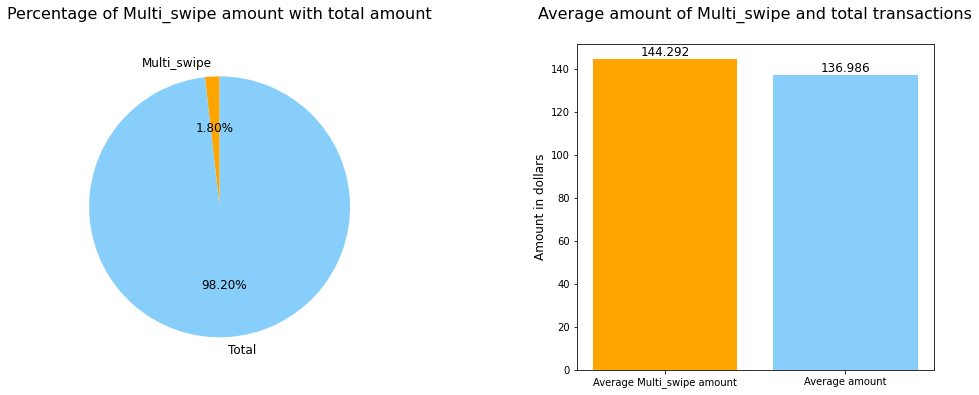

In [60]:
fig, ax_multi_all = plt.subplots(1,2,figsize=(16,6))
ax_multi_all[0].pie(size_multi[0], autopct = "%.2f%%", startangle=90, labels=['Multi_swipe','Total'], colors=['orange', 'lightskyblue'], textprops={'fontsize': 12})
ax_multi_all[0].set_title('Percentage of Multi_swipe amount with total amount''\n', fontsize=16)
ax_multi_all[1].bar(['Average Multi_swipe amount','Average amount'], size_multi[1], color=['orange', 'lightskyblue'])
ax_multi_all[1].set_title('Average amount of Multi_swipe and total transactions''\n', fontsize=16)
ax_multi_all[1].set_ylabel('Amount in dollars',fontsize=12)
for container in ax_multi_all[1].containers:
    ax_multi_all[1].bar_label(container, fontsize=12)
fig.subplots_adjust(wspace=0.5)

# Question 4: Model

In [61]:
data_model = data_prepro_new.copy()

In [62]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

## Data engineering and augmentation

Some columns should be converted to a more appropriate format for later modeling. Besides, by observing the columns, there are a few columns that can be converted to more detailed information for later modeling.
<br> 
The below lists are the columns and methods that I decide to take for a further look.
<br>
* acqCountry and merchantCountryCode: look into the different combination of acq and merchant country and pair them into a new column.
* posEntryMode and posConditionCode: look into the different combination of posEntry and posCondition and pair them into a new column.
* cardCVV and enteredCVV: check whether the CVV matches and save the result into a new column.
* transactionDateTime, dateOfLastAddressChange, currentExpDate, accountOpenDate: transfer transactionDateTime into separate columns of Year, month, day and time. Augment several columns to measure the day differences between each date column.
* availableMoney, creditLimit: check whether the availableMoney and creditLimit are equal and save the result into a new column.
* Other implementations:
  * As all the transactions were happened in 2016 after augmenting the year column, I decide to remove that column. 
  * As the 'accountNumber' and the 'customerId' columns are identical in each row, I decide to remove the 'customerId' column.
  * Encode all the object columns to int columns.
  * transfer all the bool columns to int columns.
<br><br> 


In [63]:
# plt.figure(figsize=(8, 6))
# heatmap_final = sns.heatmap(data_model.corr(), annot=True)

## acqCountry and merchantCountryCode

<br> 
Since both columns convey information about the country, I try to find out any connection between them, to better help detect fraud transaction.
<br><br>

In [64]:
data_model['acqCountry'].value_counts()

US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64

<br> 
Replace nan value with 'Other', and I can see that there are a total of 5 different countries for 'acqCountry'.
<br><br>

In [65]:
data_model['acqCountry'].replace(np.nan,'Other', inplace=True)
data_model['acqCountry'].value_counts()

US       774709
Other      4562
MEX        3130
CAN        2424
PR         1538
Name: acqCountry, dtype: int64

In [66]:
data_model['merchantCountryCode'].value_counts()

US     778511
MEX      3143
CAN      2426
PR       1559
Name: merchantCountryCode, dtype: int64

<br> 
Replace nan value with 'Other', and I can see that there are a total of 5 different countries for 'merchantCountryCode'.
<br><br>

In [67]:
data_model['merchantCountryCode'].replace(np.nan,'Other', inplace=True)
data_model['merchantCountryCode'].value_counts()

US       778511
MEX        3143
CAN        2426
PR         1559
Other       724
Name: merchantCountryCode, dtype: int64

<br> 
Combine 'acqCountry' and 'merchantCountryCode' into a new column 'countryMatch', which stores the information of both customer country and merchant country. I encode the different country into different integers starting from 1 to 5 and then convert it back to string type to combine together for a unique value. It is worth noting that '12' and '21' are different values, because the first integer indicates the acqCountry whereas the second integer indicates the merchantCountryCode, the order cannot be changed. Ideally, there should be 5 * 5 = 25 possible combinations, but there are 16 combinations in our dataset.
<br><br>

In [68]:
cat_ctry = ['acqCountry','merchantCountryCode']
for i in cat_ctry:
    lst = data_model[i].unique()
    len_ = len(lst)
    data_model[i].replace(lst,[n for n in range(1, len_+1)], inplace=True)

data_model['countryMatch'] = data_model['acqCountry'].astype(str) + data_model['merchantCountryCode'].astype(str)
data_model['countryMatch'].astype(int)
data_model['countryMatch'].value_counts()

11    774673
21      3804
45      3109
32      2413
54      1536
23       721
41        21
15        18
25        16
24        12
14        11
31        11
22         9
12         4
13         3
51         2
Name: countryMatch, dtype: int64

## posEntryMode and posConditionCode

<br> 
Very similar process with country, that is to replace nan value with 'Other', and I can see that there are a total of 6 different values for 'posEntryMode' and 4 different values for 'posConditionCode'. AFter encoding and combining the values, I store them into a created column 'posMatch'.
<br><br>

In [69]:
data_model['posEntryMode'].value_counts()

05    315035
09    236481
02    195934
90     19576
80     15283
Name: posEntryMode, dtype: int64

In [70]:
data_model['posEntryMode'].replace(np.nan,'Other', inplace=True)
lst_posEntry = data_model['posEntryMode'].unique()
data_model['posEntryMode'].value_counts()

05       315035
09       236481
02       195934
90        19576
80        15283
Other      4054
Name: posEntryMode, dtype: int64

In [71]:
data_model['posConditionCode'].value_counts()

01    628787
08    149634
99      7533
Name: posConditionCode, dtype: int64

In [72]:
data_model['posConditionCode'].replace(np.nan,'Other', inplace=True)
lst_posCondition = data_model['posConditionCode'].unique()
data_model['posConditionCode'].value_counts()

01       628787
08       149634
99         7533
Other       409
Name: posConditionCode, dtype: int64

In [73]:
cat_pos = ['posEntryMode','posConditionCode']
for i in cat_pos:
    lst = data_model[i].unique()
    len_ = len(lst)
    data_model[i].replace(lst,[n for n in range(1, len_+1)], inplace=True)

data_model['posMatch'] = data_model['posEntryMode'].astype(str) + data_model['posConditionCode'].astype(str)
data_model['posMatch'].astype(int)
data_model['posMatch'].value_counts()

31    251938
21    188991
11    156645
32     59914
22     44991
12     37429
51     15744
41     12165
52      3657
61      3304
33      2998
42      2950
23      2404
13      1761
62       693
34       185
43       159
53       157
14        99
24        95
63        54
54        18
44         9
64         3
Name: posMatch, dtype: int64

## cardCVV and enteredCVV

<br> 
If the card's CVV and entered CVV are the same, then return True and convert it into int type in 'sameCVV' column.
<br><br>

In [74]:
data_model['sameCVV'] = (data_model['cardCVV'] == data_model['enteredCVV']).astype(int)
data_model.drop(['cardCVV', 'enteredCVV'], axis=1, inplace=True)

## transactionDateTime, dateOfLastAddressChange, currentExpDate, accountOpenDate

<br> 
All 4 features are related with time. Intuitively, I decide to find out the day difference between the date of last address change, expiration date and account open date with the transaction date. I am hoping that the time differences may reflect any valuable information in terms of detecting the fraud.
<br><br>

In [75]:
cat_date = ['transactionDateTime','dateOfLastAddressChange','currentExpDate', 'accountOpenDate']

In [76]:
data_model.loc[:, cat_date]

,transactionDateTime,dateOfLastAddressChange,currentExpDate,accountOpenDate
0,2016-08-13T14:27:32,2015-03-14,06/2023,2015-03-14
1,2016-10-11T05:05:54,2015-03-14,02/2024,2015-03-14
2,2016-11-08T09:18:39,2015-03-14,08/2025,2015-03-14
3,2016-12-10T02:14:50,2015-03-14,08/2025,2015-03-14
4,2016-03-24T21:04:46,2015-08-06,10/2029,2015-08-06
...,...,...,...,...
786358,2016-12-22T18:44:12,2012-08-23,12/2022,2012-08-23
786359,2016-12-25T16:20:34,2012-08-23,08/2023,2012-08-23
786360,2016-12-27T15:46:24,2012-08-23,08/2025,2012-08-23
786361,2016-12-29T00:30:55,2012-08-23,07/2022,2012-08-23


<br> 
Convert 4 features into datetime types.
<br><br>

In [77]:
for i in cat_date:
    data_model[i] = pd.to_datetime(data_model[i])

<br> 
Find out the day differences, as well as separate the transactionDateTime into single Year, Month, Day,Time and Weekday columns. Weekday is to measure the exact weekday of any transaction I belive that it is a very essential factor to determine fraud.
<br><br>

In [78]:
data_model['daysFromLastAddressChange'] = (data_model['transactionDateTime'] - data_model['dateOfLastAddressChange']).dt.days
data_model['daysFromAccountOpenDate'] = (data_model['transactionDateTime'] - data_model['accountOpenDate']).dt.days
data_model['daysFromCurrentExpDate'] = (data_model['currentExpDate'] - data_model['transactionDateTime']).dt.days

In [79]:
data_model['transactionYear'] = pd.DatetimeIndex(data_model['transactionDateTime']).year
data_model['transactionMonth'] = pd.DatetimeIndex(data_model['transactionDateTime']).month
data_model['transactionDay'] = pd.DatetimeIndex(data_model['transactionDateTime']).day
data_model['transactionWeekday'] = pd.DatetimeIndex(data_model['transactionDateTime']).weekday
data_model['transactionTime'] = pd.DatetimeIndex(data_model['transactionDateTime']).time.astype(str)

In [80]:
for i in cat_date:
    data_model[i] = data_model[i].astype(str)

## availableMoney, creditLimit

<br> 
Find out the amount differences between aviablamoney and credit limit. If there is no difference ,then return True into the new column 'sameBalance'. 
<br><br>

In [81]:
money = data_model.loc[:, num_col]
money.head(10)

,creditLimit,availableMoney,transactionAmount,currentBalance
0,5000.0,5000.00,98.55,0.00
1,5000.0,5000.00,74.51,0.00
2,5000.0,5000.00,7.47,0.00
3,5000.0,5000.00,7.47,0.00
4,5000.0,5000.00,71.18,0.00
5,5000.0,5000.00,30.76,0.00
6,5000.0,5000.00,57.28,0.00
7,5000.0,5000.00,9.37,0.00
8,5000.0,4990.63,523.67,9.37
9,5000.0,5000.00,164.37,0.00


<br> 
Below is a distribution histogram of current balance. It is highly skewed to the right and most card holders have balances less than 10000. It is expected as a real life situation.
<br><br>

Text(0.5, 0, 'Current balance')

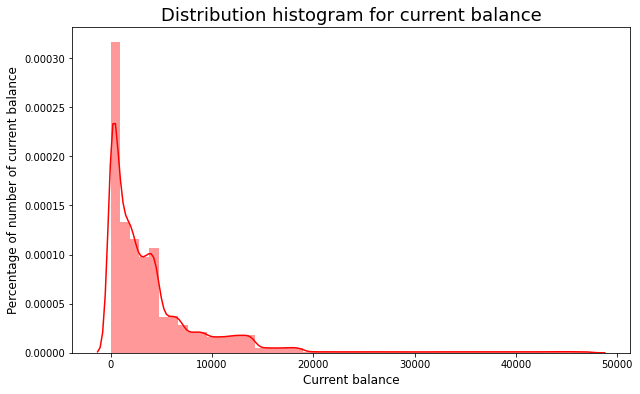

In [82]:
fig = plt.figure(figsize=(10,6))
ax_cb = sns.distplot(data_model['currentBalance'], color='red', bins=50)
ax_cb.set_title('Distribution histogram for current balance', fontsize=18)
ax_cb.set_ylabel('Percentage of number of current balance', fontsize=12)
ax_cb.set_xlabel('Current balance', fontsize=12)

In [83]:
data_model['sameBalance'] = (data_model['creditLimit'] == data_model['availableMoney']).astype(int)

## Other implementaions

<br> 
Delete transactionYear since all transactions occur in 2016. Delete customer id because it is identical to account number and delete 'transactionDateTime' column because I have already separated it into single columns, containing all the necessary time information.
<br><br>

In [84]:
data_model.drop('transactionYear', axis=1, inplace=True)
data_model.drop('customerId', axis=1, inplace=True)
data_model.drop('transactionDateTime', axis=1, inplace=True)

<br> 
switch 'isFraud' column to the last, as it is the target column.
<br><br>

In [85]:
lst_col = data_model.columns.tolist()
lst_col.remove('isFraud')
lst_col.append('isFraud')
data_model = data_model[lst_col]

In [86]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   accountNumber              786363 non-null  object 
 1   creditLimit                786363 non-null  float64
 2   availableMoney             786363 non-null  float64
 3   transactionAmount          786363 non-null  float64
 4   merchantName               786363 non-null  object 
 5   acqCountry                 786363 non-null  int64  
 6   merchantCountryCode        786363 non-null  int64  
 7   posEntryMode               786363 non-null  int64  
 8   posConditionCode           786363 non-null  int64  
 9   merchantCategoryCode       786363 non-null  object 
 10  currentExpDate             786363 non-null  object 
 11  accountOpenDate            786363 non-null  object 
 12  dateOfLastAddressChange    786363 non-null  object 
 13  cardLast4Digits            78

In [87]:
data_model

,accountNumber,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,sameCVV,daysFromLastAddressChange,daysFromAccountOpenDate,daysFromCurrentExpDate,transactionMonth,transactionDay,transactionWeekday,transactionTime,sameBalance,isFraud
0,737265056,5000.0,5000.00,98.55,Uber,1,1,1,1,rideshare,...,1,518,518,2482,8,13,5,14:27:32,1,False
1,737265056,5000.0,5000.00,74.51,AMC #191138,1,1,2,1,entertainment,...,1,577,577,2668,10,11,1,05:05:54,1,False
2,737265056,5000.0,5000.00,7.47,Play Store,1,1,2,1,mobileapps,...,1,605,605,3187,11,8,1,09:18:39,1,False
3,737265056,5000.0,5000.00,7.47,Play Store,1,1,2,1,mobileapps,...,1,637,637,3155,12,10,5,02:14:50,1,False
4,830329091,5000.0,5000.00,71.18,Tim Hortons #947751,1,1,1,1,fastfood,...,1,231,231,4938,3,24,3,21:04:46,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,50000.0,48904.96,119.92,Lyft,1,1,5,1,rideshare,...,1,1582,1582,2169,12,22,3,18:44:12,0,False
786359,732852505,50000.0,48785.04,18.89,hulu.com,1,1,2,1,online_subscriptions,...,1,1585,1585,2409,12,25,6,16:20:34,0,False
786360,732852505,50000.0,48766.15,49.43,Lyft,1,1,1,1,rideshare,...,1,1587,1587,3138,12,27,1,15:46:24,0,False
786361,732852505,50000.0,48716.72,49.89,walmart.com,1,1,2,3,online_retail,...,1,1589,1589,2009,12,29,3,00:30:55,0,False


<br> 
Object label encode.
<br><br>

In [88]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data_obj = data_model.loc[:, data_model.dtypes == object]
obj_lst = data_obj.columns.tolist()

for i in obj_lst:
    data_model[i] = labelencoder.fit_transform(data_model[i])

<br> 
Convert bool type to int.
<br><br>

In [89]:
data_bool = data_model.loc[:, data_model.dtypes == bool]
bool_lst = data_bool.columns.tolist()

for i in bool_lst:
    data_model[i] = data_model[i].astype(int)

In [90]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   accountNumber              786363 non-null  int32  
 1   creditLimit                786363 non-null  float64
 2   availableMoney             786363 non-null  float64
 3   transactionAmount          786363 non-null  float64
 4   merchantName               786363 non-null  int32  
 5   acqCountry                 786363 non-null  int64  
 6   merchantCountryCode        786363 non-null  int64  
 7   posEntryMode               786363 non-null  int64  
 8   posConditionCode           786363 non-null  int64  
 9   merchantCategoryCode       786363 non-null  int32  
 10  currentExpDate             786363 non-null  int32  
 11  accountOpenDate            786363 non-null  int32  
 12  dateOfLastAddressChange    786363 non-null  int32  
 13  cardLast4Digits            78

## modeling

<br> 
After finishing all the feature engineering above, I move forward to preparing for building models.
<br><br>

<br> 
Correlations of our variables to our target value, which is 'isFraud' that we want to predict. The below plot is the correlation heatmap.
<br><br>

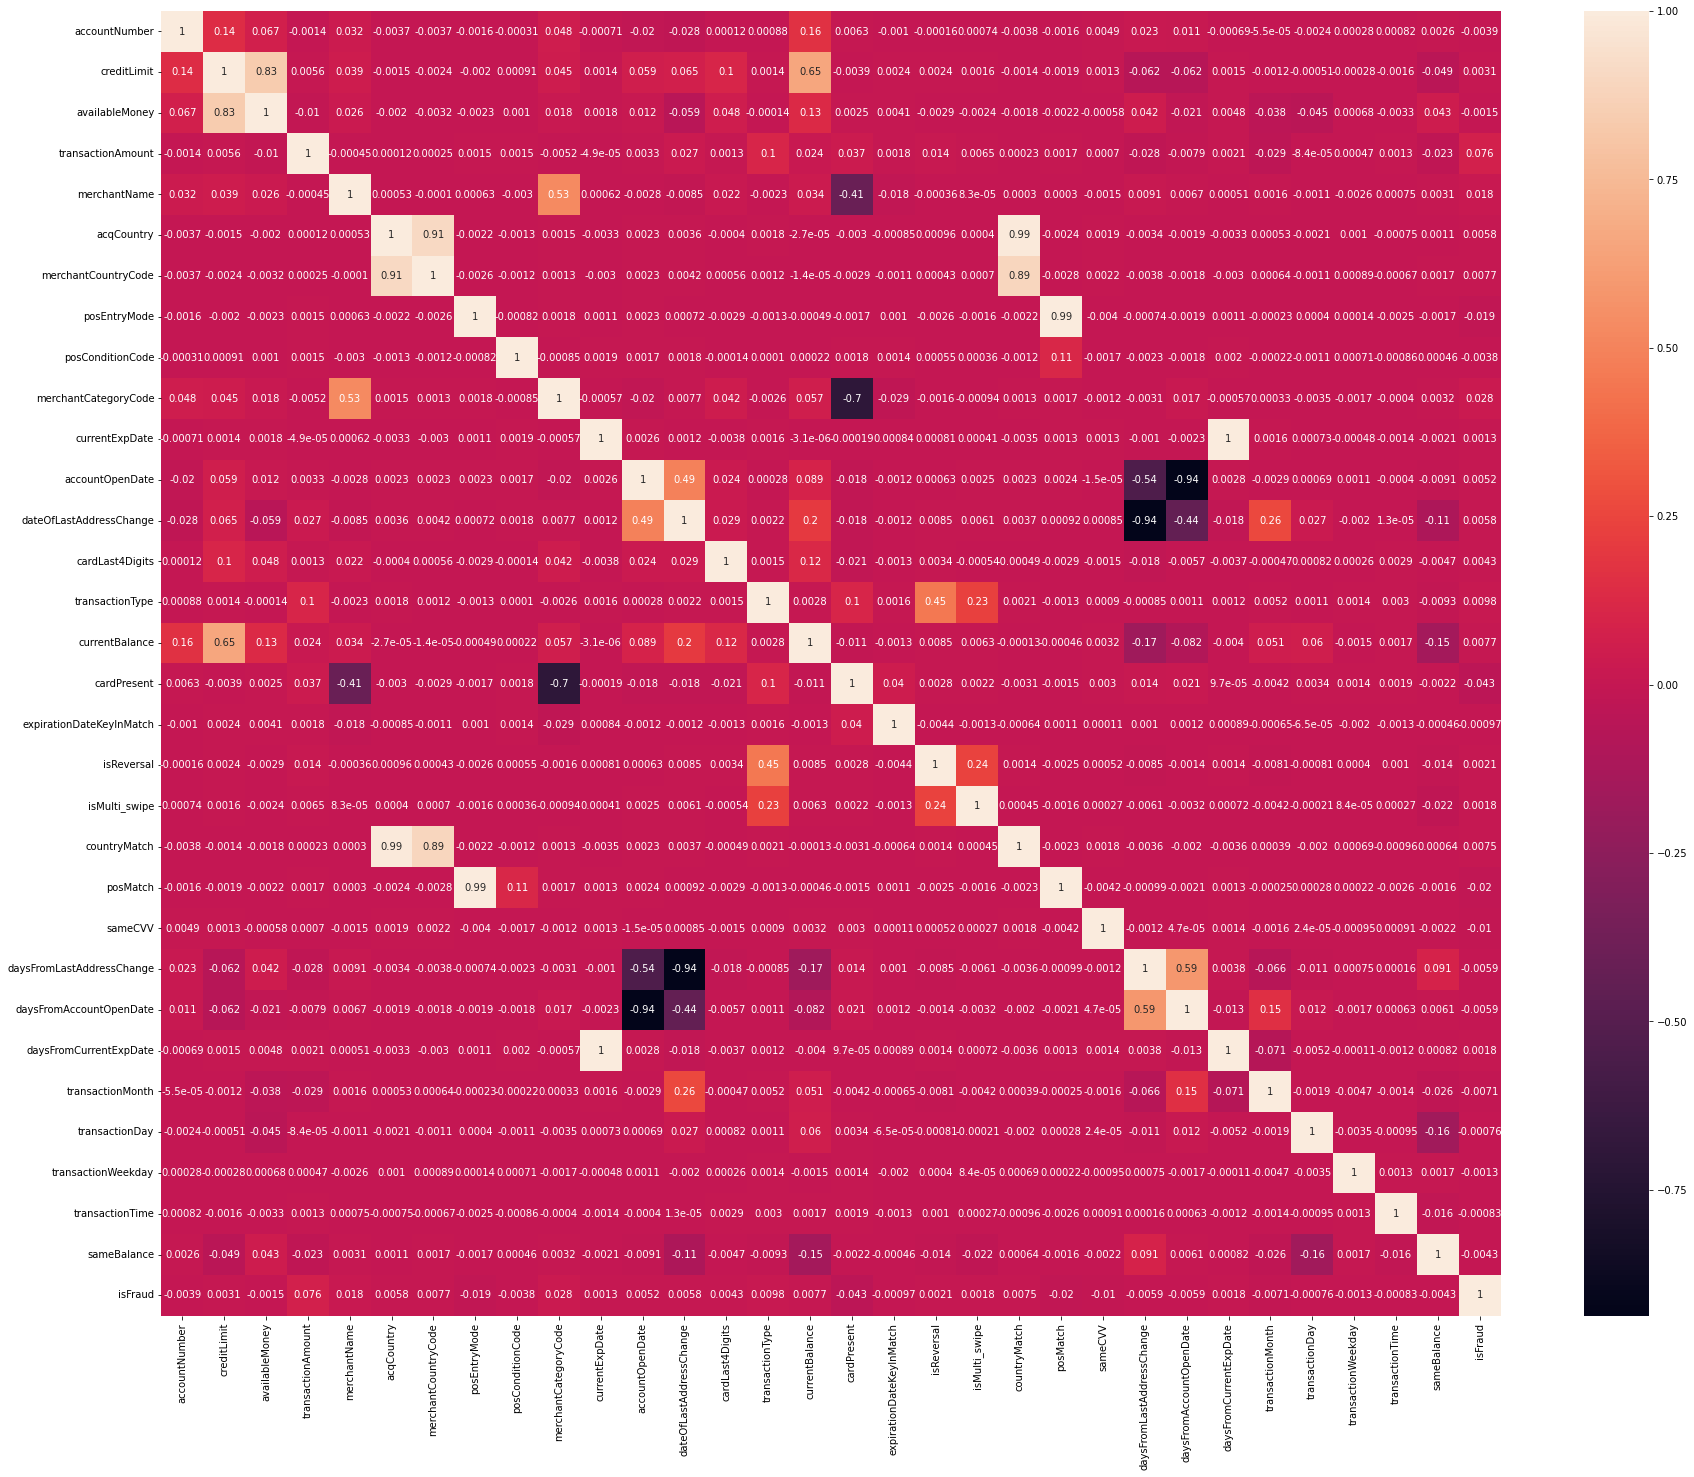

In [91]:
plt.figure(figsize=(30, 24))
heatmap_final = sns.heatmap(data_model.corr(), annot=True)

<br> 
Split into predictor and target variables.
<br><br> 

In [92]:
data_y = data_model['isFraud'].copy()
data_X = data_model.drop(['isFraud'], axis=1)

<br> 
As discovered above, the data is imbalanced. So I use SMOTE to deal with imbalanced situation.
<br><br> 

In [93]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
data_X, data_y = sm.fit_resample(data_X, data_y)

<br> 
Split into 80% training and 20% testing set, a very common modling step.
<br><br> 

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=0)

<br> 
Scaling numerical data, making it easy for the model to learn and understand the problem. 
<br><br> 

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<br>

* Create a simple pipeline function find_best_grid in testing with different classifiers as well as parameters tuning using grid search. LogisticRegression, KNN, Gaussian Naive Bayes, Random forest, MLP neural network and SVM are my most commonly used classifiers, but I also have experiences in using XGboost, Catboost and Lightgbm, etc.
<br>

* For each classifier, it returns the best parameter that I manually set for the parameter range. Then I will pass the best classifier into the function best_clf_plot to print out the confusion matrix along with accuracy, precision, recall and F1-score, and ROC curve.
<br><br>

In [96]:
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

def find_best_grid(classifier, name):
    
    if name == 'lr':
        parameters = {"C":[1], "penalty":["l1","l2"]}  #[10.0**x for x in np.arange(-3,3)]
    
    elif name == 'knn':
        parameters = {'n_neighbors': np.arange(5, 20, 1)}
        
    elif name == 'nb':
        parameters = {'var_smoothing': [0.00000001, 0.000000001, 0.00000001]}
        
    elif name == 'rf':
        parameters = {
                      'max_depth': np.arange(1, 11, 2), 
                      'n_estimators': np.arange(100, 201, 25),
                      'max_features': ['auto', 'sqrt', 'log2'],
                      'criterion' :['gini', 'entropy']} 
        
    elif name == 'mlp':
        parameters = {'solver': ['adam'],
                      'max_iter': [50,100,200,300], 
                      'alpha': [10.0**x for x in np.arange(-3,3)], 
                      'hidden_layer_sizes': np.arange(11, 31, 5),
                      'activation': ['tanh', 'relu']}
    
    elif name == 'svm_clf':
        parameters = {'gamma': [1,0.1,0.01,0.001]}
        
    best_grid = GridSearchCV(classifier, parameters, cv=2, n_jobs=-1, verbose=True)  # cv = 10 for normal case
    best_grid.fit(X_train, y_train)
    
    return best_grid.best_params_

In [97]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

class_names = ['Not Fraud', 'Fraud']
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Predicted Class', fontsize=12)
    plt.xlabel('Actual Class', fontsize=12)

def best_clf_plot(clf, name):
    plt.grid(zorder=0)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
      
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], lw=2, ls='--', color='g') 
    plt.title('ROC curve for {}'.format(name.upper()))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.ylim(0,1.1)
    plt.show()
    
    title = 'Confusion Matrix for {}'.format(name.upper())
    plot_confusion_matrix(cm, classes=class_names, title=title)
    plt.show()

<br> 
Due to the time limit, I did not finish with parameter tuning. But I still code out the layout of how the parameter tuning pipeline works in the above functions for 6 different models. You can see from the time cost that tuning logistic regression with only 4 fits  (2 fold cross validations) takes 30 minutes to finish. Therefore, I manually choose Logistic Regression and Random Forest with a time-efficient parameter. The model performance results are all shown below. I got an accuracy around 81% to 84%, and precision, recall and f1-score are all at the same numerical level. 
<br><br> 

In [98]:
import time

#Logistic Regression
time_start =time.time()
lr = LogisticRegression(random_state=0, solver='liblinear')
result = find_best_grid(lr, 'lr')
print('LR best parameters is', result)
print('\nTime to run code: {}'.format(time.time()-time_start))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
LR best parameters is {'C': 1, 'penalty': 'l2'}

Time to run code: 1746.6998105049133


In [99]:
# time_start =time.time()
# best_lr = LogisticRegression(random_state=0, solver='liblinear', C=1.0, penalty='l1')
# best_clf_plot(best_lr, 'lr')
# print('\nTime to run code: {}'.format(time.time()-time_start))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85    154744
           1       0.87      0.81      0.84    154835

    accuracy                           0.84    309579
   macro avg       0.85      0.84      0.84    309579
weighted avg       0.85      0.84      0.84    309579

[[136390  18354]
 [ 29724 125111]]


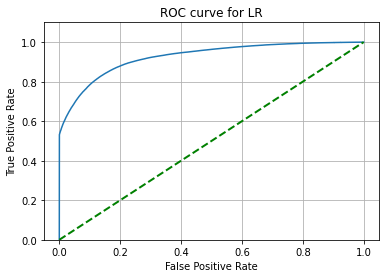

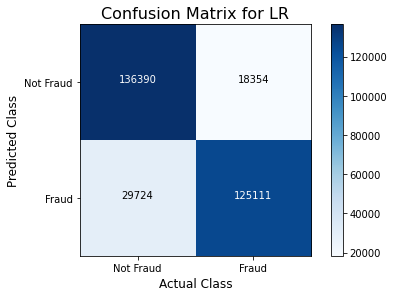


Time to run code: 68.21926617622375


In [100]:
time_start =time.time()
best_lr = LogisticRegression(random_state=0, solver='liblinear', C=1.0, penalty='l2')
best_clf_plot(best_lr, 'lr')
print('\nTime to run code: {}'.format(time.time()-time_start))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81    154744
           1       0.82      0.79      0.81    154835

    accuracy                           0.81    309579
   macro avg       0.81      0.81      0.81    309579
weighted avg       0.81      0.81      0.81    309579

[[128037  26707]
 [ 32235 122600]]


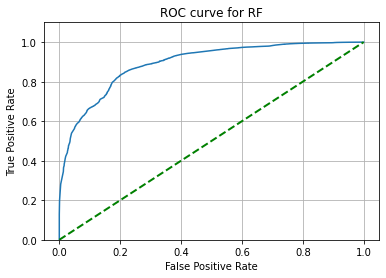

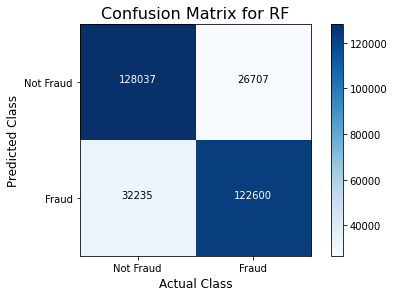


Time to run code: 135.07013130187988


In [101]:
time_start =time.time()
best_rf = RandomForestClassifier(random_state=0, max_depth=4, n_estimators=50)
best_clf_plot(best_rf, 'rf')
print('\nTime to run code: {}'.format(time.time()-time_start))